# __EDA notebook: Capstone ane.energy__

---
---

## __Basics__

---

### __Import libraries and tools__

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

---

### __Load datasets__

In [2]:
ohr_solar=pd.read_csv("../data/onlinehochrechnung_solar_mw.csv")

In [ ]:
ohr_woff=pd.read_csv("../data/onlinehochrechnung_windoffshore_mw.csv", sep='///')

In [ ]:
ohr_won=pd.read_csv("../data/onlinehochrechnung_windonshore_mw.csv", header=None)

---
---

## __Overview over datasets__

---

### __Solar dataset__

In [ ]:
ohr_solar.head()

In [ ]:
ohr_solar['dt_start_utc'].min()

In [ ]:
ohr_solar['dt_start_utc'].max()

In [ ]:
ohr_solar.describe().transpose()

In [ ]:
ohr_solar.shape

In [ ]:
ohr_solar.info()

---

#### __Check for null and nan values__

In [ ]:
ohr_solar.isnull().sum()

In [ ]:
ohr_solar.isna().sum()

---

#### __Get an understanding of the columns__

In [ ]:
ohr_solar.columns

In [ ]:
sns.pairplot(ohr_solar)

---

### __Onshore dataset__

In [ ]:
ohr_won.head()

In [ ]:
ohr_won[0].min()

In [ ]:
ohr_won[0].max()

In [ ]:
ohr_won.describe().transpose()

In [ ]:
ohr_won.shape

In [ ]:
ohr_won.info()

---

#### __Check for nan and null values__

In [ ]:
ohr_won.isna().sum()

In [ ]:
ohr_won.isnull().sum()

---

#### __Get an understanding of the columns__

In [ ]:
ohr_won.columns

In [ ]:
sns.pairplot(ohr_won)

---

### __Offshore dataset__

In [ ]:
ohr_woff.head(20)

In [ ]:
ohr_woff['dt_start_utc'].min()

In [ ]:
ohr_woff['dt_start_utc'].max()

In [ ]:
ohr_woff.describe().transpose()

In [ ]:
ohr_woff.describe

In [ ]:
ohr_woff.shape

In [ ]:
ohr_woff.info()

---

#### __Check for nan and null values__

In [ ]:
ohr_woff.isna().sum()

In [ ]:
ohr_woff.isnull().sum()

Delete the null and nan columns

In [ ]:
ohr_woff = ohr_woff.drop(['amprion', 'transnetbw'], axis = 1)

---

#### __Get an understanding of the columns__

In [ ]:
ohr_woff.columns

In [ ]:
sns.pairplot(ohr_woff)

---

## __Columns of the datasets__

In [ ]:
ohr_solar.columns

In [ ]:
ohr_woff.columns

---

#### __Rename the last column in the Offshore dataset and delete //__

In [ ]:
#ohr_woff=ohr_woff.rename(columns={'nrv//': 'nrv'})
ohr_woff=ohr_woff.rename(columns={ohr_woff.columns[3]:'nrv' })

In [ ]:
ohr_woff.head()

---

#### __Rename the unnamed columns in the Onshore dataset__

In [ ]:
ohr_won.columns

In [ ]:
ohr_won=ohr_won.rename(columns={ohr_won.columns[0]: 'dt_start_utc', ohr_won.columns[1]: 'fiftyhertz', ohr_won.columns[2]:'tennet', ohr_won.columns[3]:'amprion', ohr_won.columns[4]:'transnetbw', ohr_won.columns[5]:'nrv' })

In [ ]:
ohr_won.head()

---

### __Get an understanding of the column names meaning__

---

#### __Amprion__ 

* __one of four transmission system operators in Germany__
* __extra-high-voltage network is 11,000 km long__ and transports electricity across an area that extends from Lower Saxony to the Alps. 
* __Around a third of Germany’s economic output is generated there__. 
* Also performs overarching operations for integrated grid systems in Germany and Europe
* 2 offshore wind farms: DOLWIN4 and BORWIN4 - operation start 2028

    https://www.amprion.net/

##### __Market Platform__

* Grid Losses
* Reserve Power Plants 
* Control Energy
* Interruptible Loads 

---

#### __TenneT__ 

* __one of four transmission system operators in Germany and the Netherlands__
* 27,000 high voltage pylons
* __24,000 km high-voltage network__
* 99.9999% grid availability
* Onshore and Offshore projects
* 14 total connected offshore wind farms
* 16 interconnections
* 42,000,000 end users

    https://www.tennet.eu/#&panel1-1

---

#### __Transnet BW__

* __one of four transmission system operators in Germany__: Baden-Württemberg but ensure that electricity is supplied to the region, Germany and throughout Europe
* former part of EnBW, spun off to separate company due to the European Commission's requirements for the liberalisation of the energy market
* __power grid lines of 3,200 km__
* 11,000,000 end users
* cooperation with Amprion for the __Ultranet__ grid expansion project
* cooperation with TenneT: planning and implementing __SuedLink__ wind power line (700 km, largest infrastructure project, north-south connection)



    https://www.transnetbw.de/de

##### __Link to infeed:__ 

* https://www.transnetbw.com/en/transparency/market-data/key-figures

---

#### __50Hertz__

* 50Hertz Transmission is __one of four transmission system operators in Northern and Eastern Germany__
* __power grid lines of 10,380 km__
* 18,000,000 end users
* 50Hertz is a forerunner in the field of secure integration of renewable energy: in our grid area, more than 60 percent of the electricity consumed is already generated from renewable sources – until 2032 we want to integrate 100 percent securely. 
* 2 Offshore Wind parks: Ostwind 2 (GER), Arcadis Ost 1 (Belgian Wind Park Operator Parkwind)
* Connect Arcadis Ost 1 and Baltic Eagle (both Baltic Sea)- installation of third cable system planned for 2022

---

#### __NRV NetzRegelVerbund__

* Grid Control Cooperation: innovative network control concept, by means of which the four German transmission system operators (TSOs) optimise their control energy use and the control reserve provision technically and economically through an intelligent communication between the load-frequency controllers of the TSOs
* TSOs: 50Hertz, Amprion, TenneT, Transnet BW

* https://www.regelleistung.net/apps/datacenter/activated-values/?cooperation=NRV&qualities=OPERATIONAL&qualities=ASSURED&seriesGroups=HIJQag%2BgIgohCCMAKEkBUCMBWAskA

---

### __Renewables in Europe__

Windparks:

* https://www.thewindpower.net/online_access_de.php

* https://www.thewindpower.net/store_continent_de.php?id_zone=1000

Offshore: 

* http://153.97.132.92/qgiswebclient.html?map=/var/qgis-web-client/projects/wind_farm.qgs&searchtables=search_wind&lang=de&startExtent=6.4,51.3,14.5,58.3

Offshore network overview:

* https://www.erneuerbare-energien.de/EE/Navigation/DE/Technologien/Windenergie-auf-See/Offshore-Projekte/Netzanbindungen/netzanbindungen.html

---

### __Split time stemp__

In [4]:
ohr_solar['year'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.year
ohr_solar['month'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.month
ohr_solar['day'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.day
ohr_solar['hour'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.hour
ohr_solar['minute'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.minute
ohr_solar['seconds'] = pd.to_datetime(ohr_solar['dt_start_utc']).dt.second
ohr_solar['date']=pd.to_datetime(ohr_solar['dt_start_utc']).dt.date

In [ ]:
ohr_woff['year'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.year
ohr_woff['month'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.month
ohr_woff['day'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.day
ohr_woff['hour'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.hour
ohr_woff['minute'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.minute
ohr_woff['seconds'] = pd.to_datetime(ohr_woff['dt_start_utc']).dt.second

In [ ]:
ohr_won['year'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.year
ohr_won['month'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.month
ohr_won['day'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.day
ohr_won['hour'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.hour
ohr_won['minute'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.minute
ohr_won['seconds'] = pd.to_datetime(ohr_won['dt_start_utc']).dt.second
ohr_won['date']=pd.to_datetime(ohr_won['dt_start_utc']).dt.date


No solar values between 4PM and 7AM due to sun light availability in winter month. In summer between 8PM and 2AM.

In [ ]:
ohr_solar.tail(10)

In [ ]:
ohr_woff.head(10)

In [ ]:
ohr_won.head(10)

---
---

# __Plots__

---

## __Solar__

In [5]:
ohr_solar.head()

,dt_start_utc,fiftyhertz,tennet,amprion,transnetbw,nrv,year,month,day,hour,minute,seconds,date
0,2011-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,2011,12,31,23,0,0,2011-12-31
1,2012-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,2012,1,1,0,0,0,2012-01-01
2,2012-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,2012,1,1,1,0,0,2012-01-01
3,2012-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,2012,1,1,2,0,0,2012-01-01
4,2012-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,2012,1,1,3,0,0,2012-01-01


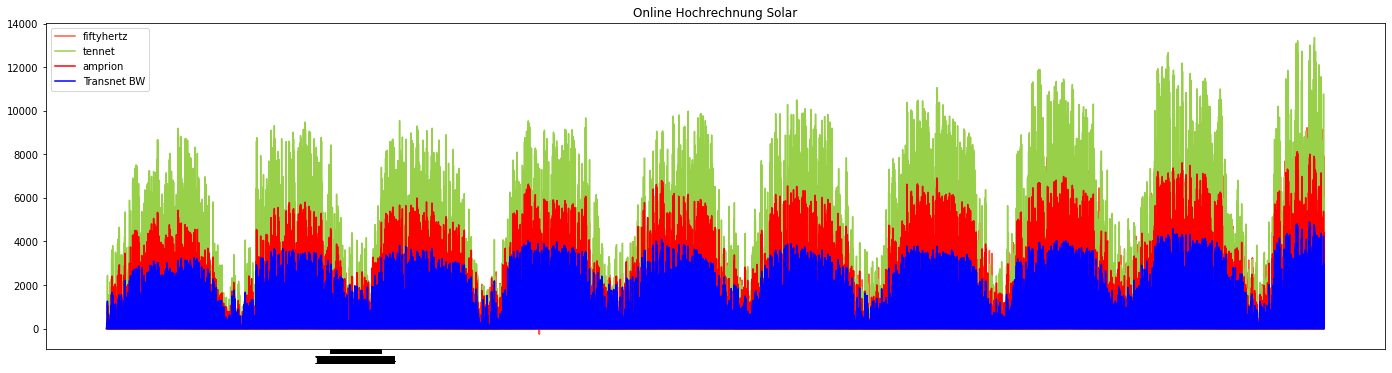

In [6]:
    # Plot the statistics
plt.figure(figsize=(24,6))
plt.plot(ohr_solar['fiftyhertz'], color='#FF5A36', label='fiftyhertz')
plt.plot(ohr_solar['tennet'], color='#99D04A',label='tennet')
plt.plot(ohr_solar['amprion'], color='red',label='amprion')
plt.plot(ohr_solar['transnetbw'], color='blue',label='Transnet BW')
plt.xticks(ohr_solar['date'])
plt.title('Online Hochrechnung Solar')
plt.legend(loc='best')    

---

## __Wind__

In [7]:
speedy=pd.read_csv('../data/einspeisedaten_gen_wind_speed.csv')

In [25]:
speedy.head(388)

,dt_start_utc,voronoi_area_id,windspeed_ms
0,2018-12-31 23:00:00,1,9.523
1,2018-12-31 23:00:00,2,9.691
2,2018-12-31 23:00:00,4,14.258
3,2018-12-31 23:00:00,5,14.062
4,2018-12-31 23:00:00,6,11.504
...,...,...,...
383,2018-12-31 23:45:00,107,14.916
384,2018-12-31 23:45:00,109,14.125
385,2019-01-01 00:00:00,1,8.601
386,2019-01-01 00:00:00,2,9.741


* 385 values per hour of the timestemp
* 6,548,085 rows, divided by the number of a normal year = 17,008.013 rows
* 708,667 days between 31.12.2018 and 30.09.2020 
* want to create a mean or median of the 385 values of 1h to compare and merge it with the onshore, offshore and solar csv

In [26]:
speedy_short=speedy[:385]   # Delete everything but the first 99 rows.

In [27]:
speedy_short.shape

(385, 3)

In [29]:
speedy_short.tail()

,dt_start_utc,voronoi_area_id,windspeed_ms
380,2018-12-31 23:45:00,103,15.806
381,2018-12-31 23:45:00,105,14.343
382,2018-12-31 23:45:00,106,15.156
383,2018-12-31 23:45:00,107,14.916
384,2018-12-31 23:45:00,109,14.125


In [32]:
speedy_short['windspeed_ms'].mean()

12.875275324675323

In [40]:
speedy_short['windspeed_ms'].median()

13.159

get the hourly data to 1 median

In [52]:
speedy_med=speedy.groupby(np.arange(len(speedy))//386).median()

In [53]:
speedy_med

,voronoi_area_id,windspeed_ms
0,56.5,13.1575
1,53.0,13.6985
2,53.5,14.3150
3,57.0,14.9830
4,56.0,14.8665
...,...,...
16959,58.0,6.1290
16960,50.0,5.9830
16961,61.0,6.0775
16962,50.5,6.4140


In [14]:
speedy.tail()

,dt_start_utc,voronoi_area_id,windspeed_ms
6548080,2020-09-30 23:45:00,105,6.222
6548081,2020-09-30 23:45:00,106,7.116
6548082,2020-09-30 23:45:00,107,5.291
6548083,2020-09-30 23:45:00,108,7.096
6548084,2020-09-30 23:45:00,109,5.785


In [10]:
speedy.shape

(6548085, 3)

In [11]:
speedy.isnull().sum()

dt_start_utc       0
voronoi_area_id    0
windspeed_ms       0
dtype: int64

In [12]:
speedy.isna().sum()

dt_start_utc       0
voronoi_area_id    0
windspeed_ms       0
dtype: int64

In [13]:
speedy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
voronoi_area_id,6548085.0,55.466500,31.185383,1.0,29.000,55.000,82.000,109.00
windspeed_ms,6548085.0,6.789224,3.162042,0.0,4.589,6.391,8.562,28.74


In [43]:
speedy.head()

,dt_start_utc,voronoi_area_id,windspeed_ms
0,2018-12-31 23:00:00,1,9.523
1,2018-12-31 23:00:00,2,9.691
2,2018-12-31 23:00:00,4,14.258
3,2018-12-31 23:00:00,5,14.062
4,2018-12-31 23:00:00,6,11.504


In [54]:
speedy_med.head()

,voronoi_area_id,windspeed_ms
0,56.5,13.1575
1,53.0,13.6985
2,53.5,14.3150
3,57.0,14.9830
4,56.0,14.8665


In [65]:
speedy['total'] = speedy.loc[speedy['voronoi_area_id'] < 110].mean(axis=1)

In [66]:
speedy.head()

,dt_start_utc,voronoi_area_id,windspeed_ms,total
0,2018-12-31 23:00:00,1,9.523,5.2615
1,2018-12-31 23:00:00,2,9.691,5.8455
2,2018-12-31 23:00:00,4,14.258,9.1290
3,2018-12-31 23:00:00,5,14.062,9.5310
4,2018-12-31 23:00:00,6,11.504,8.7520


In [64]:
speedy.mean(axis='columns')

0           5.2615
1           5.8455
2           9.1290
3           9.5310
4           8.7520
            ...   
6548080    55.6110
6548081    56.5580
6548082    56.1455
6548083    57.5480
6548084    57.3925
Length: 6548085, dtype: float64

In [55]:
speedy_min=speedy.groupby(np.arange(len(speedy))//385).min()

In [56]:
speedy_min.head()

,dt_start_utc,voronoi_area_id,windspeed_ms
0,2018-12-31 23:00:00,1,7.267
1,2019-01-01 00:00:00,1,7.269
2,2019-01-01 00:45:00,1,7.270
3,2019-01-01 01:45:00,1,7.271
4,2019-01-01 02:45:00,2,7.272


In [47]:
speedy_min.shape

(17009, 3)

In [50]:
speedy_max=speedy.groupby(np.arange(len(speedy))//385).max()

In [51]:
speedy_max.head()

,dt_start_utc,voronoi_area_id,windspeed_ms
0,2018-12-31 23:45:00,109,18.520
1,2019-01-01 00:45:00,109,17.975
2,2019-01-01 01:45:00,109,18.137
3,2019-01-01 02:45:00,109,20.706
4,2019-01-01 03:45:00,109,21.225
